In [1]:
# import the necessary libraries
!pip3 install statsmodels
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip3 install sklearn
import sklearn


from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

### Import the Lego data set

In [2]:
# import lego data set
df_lego = pd.read_csv('lego.csv')

# view DataFrame
df_lego

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.9900,2,277,4.0,0,20
1,19,19.9900,2,168,4.0,2,20
2,19,12.9900,11,74,4.3,2,20
3,5,99.9900,23,1032,3.6,0,20
4,5,79.9900,14,744,3.2,1,20
...,...,...,...,...,...,...,...
12256,23,36.5878,6,341,4.4,2,19
12257,23,24.3878,8,217,4.1,2,19
12258,23,24.3878,18,233,4.6,2,19
12259,20,12.1878,1,48,5.0,4,19


In [3]:
df_lego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  int64  
 1   list_price         12261 non-null  float64
 2   num_reviews        12261 non-null  int64  
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   12261 non-null  float64
 5   review_difficulty  12261 non-null  int64  
 6   country            12261 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 670.6 KB


In [4]:
df_lego.describe()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
count,12261.00000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,16.68828,65.141998,14.603050,493.405921,3.709689,1.988826,10.015333
std,8.21868,91.980429,34.356847,825.364580,1.641130,1.787565,6.185450
min,0.00000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000
25%,11.00000,19.990000,1.000000,97.000000,3.600000,0.000000,4.000000
50%,19.00000,36.587800,4.000000,216.000000,4.400000,2.000000,10.000000
75%,23.00000,70.192200,11.000000,544.000000,4.700000,4.000000,15.000000
max,30.00000,1104.870000,367.000000,7541.000000,5.000000,5.000000,20.000000


In [5]:
df_lego.shape

(12261, 7)

### Describing the data set
- **Num of Rows :** 12261
- **Num of Columns :** 7


In [6]:
# There are 12261 Rows and 7 Cols in the dataset
# Check for missing values
df_lego.isna().sum()

ages                 0
list_price           0
num_reviews          0
piece_count          0
play_star_rating     0
review_difficulty    0
country              0
dtype: int64

In [7]:
# Check for null values
df_lego.isnull().sum()

ages                 0
list_price           0
num_reviews          0
piece_count          0
play_star_rating     0
review_difficulty    0
country              0
dtype: int64

### Sense check the data
- **There are No missing values in any of the columns in the Lego data set**

#### Min and Max values in lego data set 

In [8]:
df_lego.min()

ages                 0.0000
list_price           2.2724
num_reviews          0.0000
piece_count          1.0000
play_star_rating     0.0000
review_difficulty    0.0000
country              0.0000
dtype: float64

In [9]:
df_lego.max()

ages                   30.00
list_price           1104.87
num_reviews           367.00
piece_count          7541.00
play_star_rating        5.00
review_difficulty       5.00
country                20.00
dtype: float64

In [10]:
#MAX value of ages
df_lego['ages'].max()

30

In [11]:
#MAX value of list_price
df_lego['list_price'].max()

1104.87

### Obervations based on Min and Max values
-  Number of **Lego pieces range** from **Min value** of **1** to the **Max value** of **7541** pieces
- **Price** of the Lego product (in US dollars) ranges from **Min value** of **2.2724** to the **Max value** of **1104.87** US$


In [12]:
#Check how many records show list_price <=400 US$
df_lego[df_lego['list_price']<=400].count()

ages                 12075
list_price           12075
num_reviews          12075
piece_count          12075
play_star_rating     12075
review_difficulty    12075
country              12075
dtype: int64

Text(0.5, 1.0, 'Number of Lego Pieces ~ Price in US$')

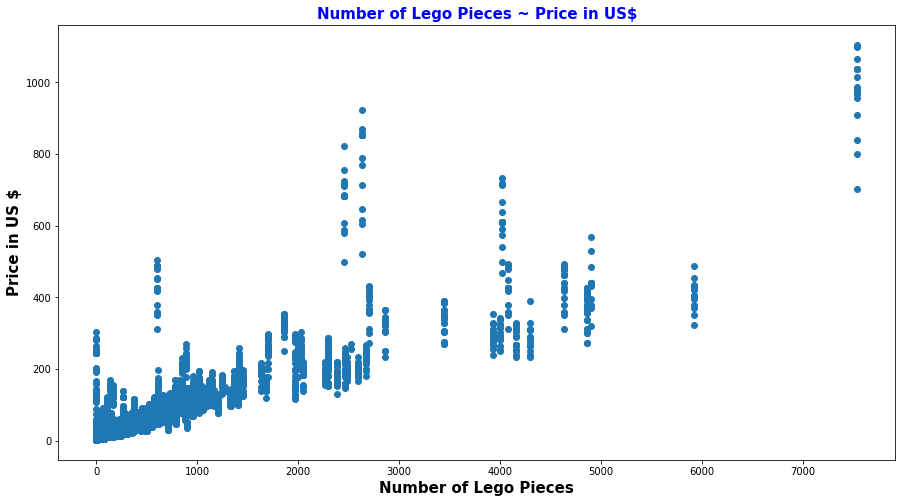

In [13]:
# dependent variable
y = df_lego['list_price'] 
 # independent variable
X = df_lego['piece_count']

# check for linearity
plt.figure(figsize=(15,8))
plt.scatter(X,y)
plt.xlabel("Number of Lego Pieces", fontsize=15, fontweight='bold')
plt.ylabel("Price in US $", fontsize=15, fontweight='bold')
plt.title("Number of Lego Pieces ~ Price in US$",fontsize=15, fontweight='bold', loc='center', color='blue')


### Obervations based on Scatterplot 

1. **Minimum Price** of Lego product is **2.2742 US$** 

2.  **Maximum Price** is **1104.87 US$**

3. **Majority (count=12075)** of the available Lego products are in the **price range** of **3 to 400 US$**

4. **Very few** Lego products go **beyond** the price of **400** **US$**

5. **Price** of Lego products goes **beyond** **600** **US$** for the **first time** when the **No. of Lego pieces** is between **2500** and **2700 pieces**


### Run OLS Test with below parameters
- **Dependent Variable** [ y ]: **Price in US$**
- **Independent Variable** [ X ]: **Number of Pieces in the Lego product**

In [14]:
f = 'y ~ X'
ols_test = ols(f, data = df_lego).fit()

ols_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 3.804e+04
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        05:31:41   Log-Likelihood:                -64182.
No. Observations:               12261   AIC:                         1.284e+05
Df Residuals:                   12259   BIC:                         1.284e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.3243      0.478     36.256      0.000      16.388      18.261
X              0.0969      0.000    195.027      0.000       0.096       0.098
==============================================================================
Omnibus:                    13987.172   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2037748.322
Skew:                           5.819   Prob(JB):                         0.00
Kurtosis:                      65.075   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Obervations based on Simple Linear Regression Analysis

1. **R-squared (the coefficient of determination)** is **0.756**.


2.  We have a **High** value of the **coefficient of determination**, which means:
      - There is a **Strong relationship** between the model and dependent variable **Price**
      - We can say that **75.6%** of the **Variation in the Price** is **explained by** the variation in the **Number of Pieces**
      

3. **Standard Error** is  **0.478**

In [16]:
# x coef: 0.0969
# constant coef: 17.3243
m = 0.0969
c = 17.3243
y_pred = m * X + c

y_pred

0         44.1656
1         33.6035
2         24.4949
3        117.3251
4         89.4179
           ...   
12256     50.3672
12257     38.3516
12258     39.9020
12259     21.9755
12260     27.8864
Name: piece_count, Length: 12261, dtype: float64

Text(0.5, 1.0, 'Number of Lego Pieces vs Price in US$')

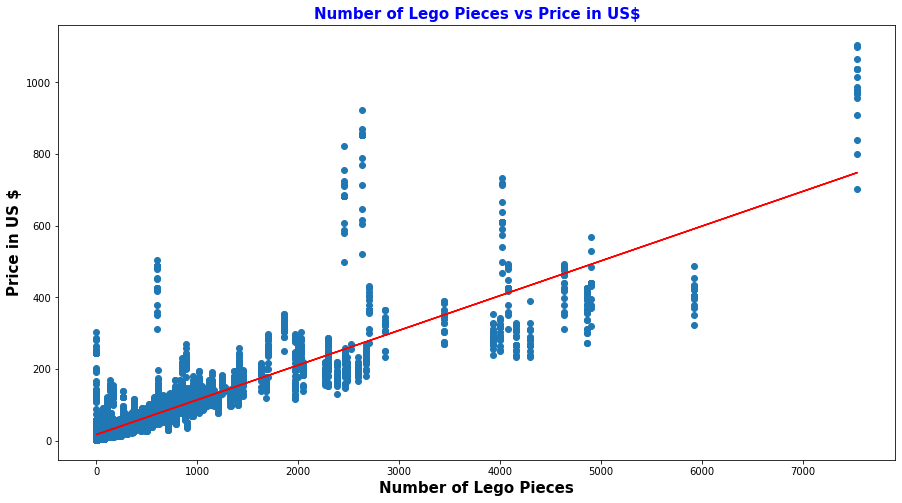

In [17]:
# set the plot size
plt.figure(figsize=(15,8))

# plot the data points
plt.scatter(X,y)

# plot the line
plt.plot(X,y_pred, color='red')
plt.xlabel("Number of Lego Pieces", fontsize=15, fontweight='bold')
plt.ylabel("Price in US $", fontsize=15, fontweight='bold')
plt.title("Number of Lego Pieces vs Price in US$",fontsize=15, fontweight='bold', loc='center', color='blue')


#### Question 1 :  What price should be set for the Lego sets that have 8,000 Lego pieces?

In [18]:
#To answer Q1, we set X(no. of pieces) to 8000 and calculate predicted value of y ( Price ) \
#Using the regression equation: y_pred = m * X + c

X = 8000 #no. of pieces set to 8000

y_pred_8k = m * X + c

print(y_pred_8k)

792.5243


##### Question 1 :  What price should be set for the Lego sets that have 8,000 Lego pieces?
### Answer : 
Based on the Regression Equation, **Predicted Price** for the Lego set having **8000 pieces** is : **792.5243 US $**

### Multiple Linear Regression [MLR]

In [19]:
# Extract the records that have age == 30
df_lego_ages_30 = df_lego[df_lego['ages']==30]

# dependent variable
y = df_lego_ages_30['list_price'] 
# independent variables

X = df_lego_ages_30[['piece_count', 'ages']]

In [20]:
df_lego_ages_30.count()

ages                 92
list_price           92
num_reviews          92
piece_count          92
play_star_rating     92
review_difficulty    92
country              92
dtype: int64

In [21]:
print(X)

       piece_count  ages
735            370    30
737           1020    30
740            513    30
743             10    30
755            494    30
...            ...   ...
11666           10    30
12206          370    30
12208         1020    30
12211          513    30
12212           10    30

[92 rows x 2 columns]


In [22]:
# create train and test data sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)

In [23]:
multi = LinearRegression()  
multi.fit(x_train, y_train)

LinearRegression()

In [24]:
multi.predict(x_train)

array([53.05494481, 53.05494481, 91.67833234, 66.8216968 , 53.05494481,
       66.8216968 , 66.8216968 , 91.67833234, 91.67833234, 72.29015662,
       62.61518925, 53.05494481, 53.05494481, 91.67833234, 72.29015662,
       91.67833234, 53.05494481, 72.29015662, 72.29015662, 72.29015662,
       91.67833234, 72.29015662, 53.05494481, 53.05494481, 91.67833234,
       66.8216968 , 53.05494481, 66.8216968 , 91.67833234, 72.29015662,
       91.67833234, 91.67833234, 91.67833234, 91.67833234, 66.8216968 ,
       91.67833234, 72.29015662, 53.05494481, 72.29015662, 53.05494481,
       66.8216968 , 72.29015662, 72.29015662, 53.05494481, 66.8216968 ,
       66.8216968 , 72.29015662, 72.29015662, 91.67833234, 71.56357804,
       72.29015662, 53.05494481, 66.8216968 , 91.67833234, 53.05494481,
       71.56357804, 66.8216968 , 91.67833234, 62.61518925, 70.87524044,
       66.8216968 , 91.67833234, 66.8216968 , 66.8216968 ])

In [25]:
# Checking the value of R-squared, intercept and coefficients
print("R-squared: ", multi.score(x_train, y_train))
print("Intercept: ", multi.intercept_)
print("Coefficients:")
list(zip(x_train, multi.coef_))

R-squared:  0.2956084339748204
Intercept:  52.67253503621316
Coefficients:


[('piece_count', 0.03824097774405698), ('ages', 0.0)]

In [26]:
df_lego_ages_30['piece_count'].max()

1020

##### Question 2 :  What price should be set for all the Lego sets that have 8,000 Lego pieces and are most likely to be purchased by customers who are 30 years old?
### Answer : 
**We don't have enough data to predict the price for Lego sets in the category of 8000 Lego piecesin and for the age group 30 years.**

### Obervations based on Multiple Linear Regression Analysis

1. **R-squared (the coefficient of determination)** is **very Low**.


2.  A **Very LOW** value of the **coefficient of determination** means:
      - There is a **Very WEAK or NO Relationship** between the model and dependent variables **Price** and **Ages**
      

3. Furthermore, looking at the data for Lego sets for ages = 30, **the maximum number of pieces for the age group 30** is **1020**. Therefore, it is **not feasible** to predict the price of Lego sets having 8000 pieces for the age group 30.


4. **We should look at a different age group where we have more sales data available.**



5. **Other than ages we should analys if there is a strong relationship between price and country**
      

In [27]:
# BELOW PREDICTION IS IRRELEVANT AS THERE IS NO RELATIONSHIP BETWEEN PRICE AND AGE GROUP 30 WITH PIECE_COUNT 8000
###################################################################################################################
# make predictions
New_Value1 = 8000
New_Value2 = 30
print ('Predicted Value: \n', multi.predict([[New_Value1 ,New_Value2]]))  

Predicted Value: 
 [358.60035699]


/Users/Saurabh/opt/anaconda3/envs/Python/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Determine the most popular and the most expensive products purchased by a particular group of customers.

 1. **Which are the most popular (i.e. with the most number of reviews) Lego sets purchased by customers who are at the most 25 years old (<25 years)?**
 
 2. **What is the most expensive Lego set purchased by customers who are at least 25 years old (>25 years)?**

In [28]:
df_lego.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.99,2,277,4.0,0,20
1,19,19.99,2,168,4.0,2,20
2,19,12.99,11,74,4.3,2,20
3,5,99.99,23,1032,3.6,0,20
4,5,79.99,14,744,3.2,1,20


In [37]:
# Maximum number of review in the lego data set
max_reviews = df_lego['num_reviews'].max()
max_reviews

367

### Determine the customer group that will most likely leave a review on the products they have purchased.

In [51]:
df_lego[df_lego['num_reviews'] == max_reviews]

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
409,7,119.9900,367,1969,4.6,1,20
1099,7,129.1924,367,1969,4.6,1,1
1674,7,146.3878,367,1969,4.6,1,0
2240,7,158.5878,367,1969,4.6,1,2
2937,7,116.9922,367,1969,4.6,1,3
3629,7,141.7800,367,1969,4.6,1,4
4174,7,158.3520,367,1969,4.6,1,5
4723,7,158.5878,367,1969,4.6,1,6
5295,7,131.8800,367,1969,4.6,1,7
5847,7,158.5878,367,1969,4.6,1,8


### Question: Which age group submits the most reviews?
### Answer:
Based on **above data**, **Maximum number of reviews (367)** are submitted in the **age group of 7 years**


In [52]:
#Lego sets purchased in the age group less than 25 years old
df_lego['ages'] < 25
df_lego_age_25 = df_lego[df_lego['ages'] < 25]
df_lego_age_25
#Lego sets purchased in the age group upto 25 years old with maximum no. of reviews
df_lego_25_max_rev = df_lego_age_25[df_lego_age_25['num_reviews']== max_reviews]
df_lego_25_max_rev

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
409,7,119.9900,367,1969,4.6,1,20
1099,7,129.1924,367,1969,4.6,1,1
1674,7,146.3878,367,1969,4.6,1,0
2240,7,158.5878,367,1969,4.6,1,2
2937,7,116.9922,367,1969,4.6,1,3
3629,7,141.7800,367,1969,4.6,1,4
4174,7,158.3520,367,1969,4.6,1,5
4723,7,158.5878,367,1969,4.6,1,6
5295,7,131.8800,367,1969,4.6,1,7
5847,7,158.5878,367,1969,4.6,1,8


### Question:  Which are the most popular (i.e. with the most number of reviews) Lego sets purchased by customers who are at the most 25 years old (<25 years)?

### Answer :  
Most popular with the maximum 367 reviews are in the **age group 7 years** and interestingly the **number of lego pieces** in all of them are **1969**, with **player rating 4.6**


In [43]:
#Create a data set for the ages greater than 25
df_lego_ages_gt_25 = df_lego[df_lego['ages'] > 25]
#Maximum list price (most expensive lego set)
max_list_price = df_lego_ages_gt_25['list_price'].max()
print(max_list_price)
df_lego_ages_gt_25[df_lego_ages_gt_25['list_price'] == max_list_price]

259.87


,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
9913,29,259.87,6,1413,4.3,0,16


### Question: What is the most expensive Lego set purchased by customers who are at least 25 years old (>25 years)?

### Answer :
The **most expensive** Lego set purchased by customers who are at least 25 years old **(>25 years)** is as below:

Ages: **29**

List Price: **259.87 US$**

Number of Pieces: **1413**

Player Star Rating: **4.3**

Country: **16**
